In [54]:
### LIBRARIES AND PACKAGES

# BASIC DATA HANDLING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import datetime as dt
import time
from dateutil.parser import parse


# FINANCE LIBRARIES
import yahoo_fin.stock_info as si
from yahoo_fin.options import *
from yahoo_fin import news
import yfinance as yf
import opstrat as op


# OPTIONS AND SETTINGS
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [38]:
### OPTIONS CHAIN

# Test ticker (will be input in future)
ticker = 'AAPL'

# Grab upcomming expiration dates
expiration_dates = get_expiration_dates(ticker)

for i in expiration_dates:
    print(i)

# Get chain data for given expiration date
chain = get_options_chain(ticker, expiration_dates[2])
calls_df = pd.DataFrame(chain['calls'])
puts_df = pd.DataFrame(chain['puts'])

June 4, 2021
June 11, 2021
June 18, 2021
June 25, 2021
July 2, 2021
July 9, 2021
July 16, 2021
August 20, 2021
September 17, 2021
October 15, 2021
November 19, 2021
December 17, 2021
January 21, 2022
June 17, 2022
September 16, 2022
January 20, 2023
March 17, 2023
June 16, 2023


In [ ]:
# BROKEN

### STEP 1. ANALYZE THE CHAIN FOR OPPERTUNITIES
# Look for call and put option with volumes > avg. daily trading volume in near term months
active_calls = calls_df.where(calls_df['Volume'] >= calls_df['Open Interest'])
calls_df.where(calls_df['Strike'] == 120)
type(calls_df['Strike'])

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
72,AAPL210618C00125000,2021-06-03 3:51PM EDT,125.0,1.66,1.67,1.68,-0.71,-29.96%,14688,67530,22.52%


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
72,AAPL210618P00125000,2021-06-03 3:45PM EDT,125.0,3.04,3.1,3.15,0.78,+34.51%,3048,47246,22.63%


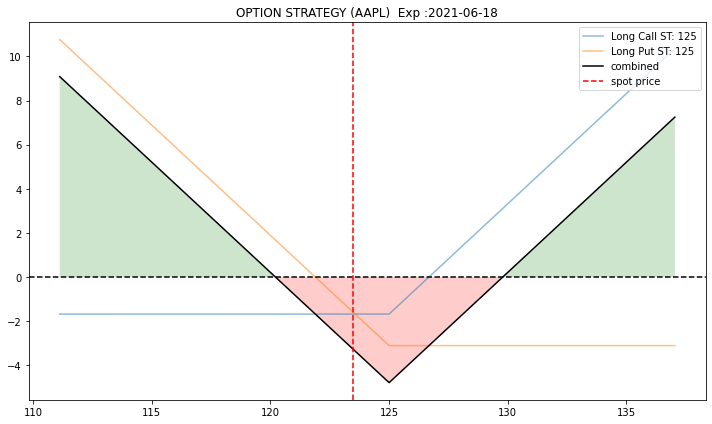

2.69 %

total cost of entering into an ATM straddle position: 332.0
Anticipated move for AAPL stock by: 2021-06-18 is approximately: 2.69 %


In [147]:
### STEP 2. DETERMINE THE MAGNITUDE WITH STRADDLES

# Rounding function for underlying price and strike price
def round_by5(x, base=5):
    high = base * np.round(x/base)
    low = base * np.round(x/base) - base
    return int(low), int(high)

### GET CURRENT PRICE OF UNDERLYING
underlying = yf.Ticker(ticker)
lastclose = pd.Series(underlying.history(period='1d')['Close'])
price = lastclose.values


### DISPLAY AT THE MONEY OPTIONS
# ATM call
high_strike = (calls_df.where(calls_df['Strike'] == round_by5(price)[1]))
atm_call = (high_strike.dropna())
display(atm_call)

# ATM put
high_strike = (puts_df.where(puts_df['Strike'] == round_by5(price)[1]))
atm_put = (high_strike.dropna())
display(atm_put)




### VISUALIZE STRADDLE
# Format Date
parsed_date = parse(expiration_dates[2])
parsed_date_str = str(parsed_date).strip(' 00:00:00')

# Plot Straddle
op_1={'op_type': 'c', 'strike':round_by5(price)[1], 'tr_type': 'b'}
op_2={'op_type': 'p', 'strike':round_by5(price)[1], 'tr_type': 'b'}

op.yf_plotter(ticker=ticker, exp=parsed_date_str, op_list=[op_1, op_2])


### CALCULATE ANTICIAPTED MOVE
# Straddle Cost
call_price = atm_call['Last Price']
put_price = atm_put['Last Price']
straddle_float = call_price + call_price
straddle_cost = straddle_float.to_numpy()[0] * 100

# Calculate anticipated move
block_share_cost = price * 100
anticipated_move = (straddle_cost / block_share_cost)

#format_anticiapted_move = anticipated_move.astype(float).tolist()
pct_anticipated_move = (anticipated_move * 100)
pct_move = np.round(pct_anticipated_move[0], 2)
print(pct_move,'%')




print()
print('total cost of entering into an ATM straddle position:', straddle_cost)
print('Anticipated move for', ticker, 'stock by:', parsed_date_str, 'is approximately:', pct_move,'%')
